# Titanic Survival Prediction 

#  Setup and EDA (Exploratory Data Analysis)

## Clone tinanic daaset

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv("C:/Users/Prachi/OneDrive/Desktop/Data Science learning/Titanic Survival Prediction Project/Titanic-Dataset.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
#Extract titles from names
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Prachi\AppData\Local\Temp\ipykernel_23676\1054203623.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


## Inspect and impute missing values 

In [11]:
# check missing values in dataset 
missing_values = df.isnull()
print(missing_values)

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

<Axes: >

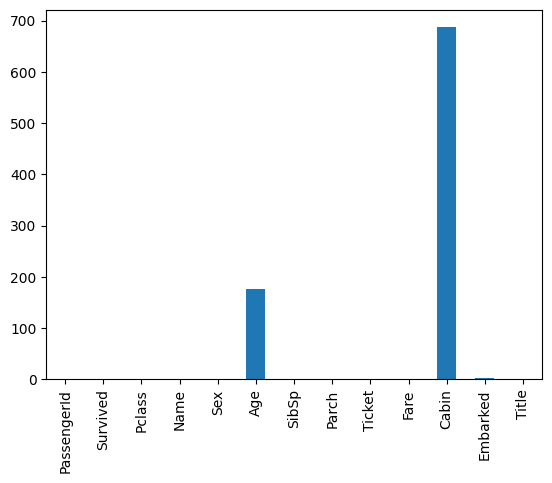

In [12]:
# visualize missing values using bar plot 
df.isnull().sum().plot(kind='bar')

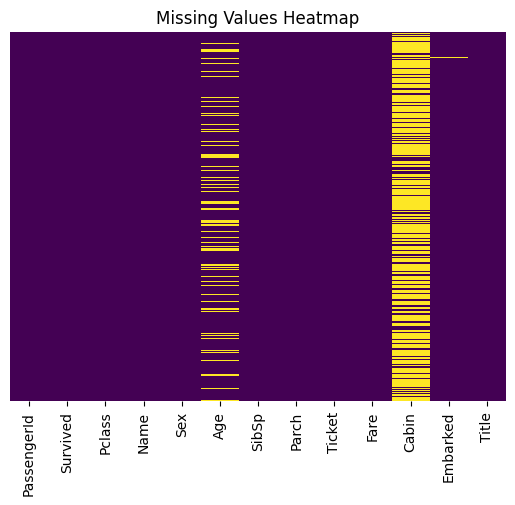

In [13]:
# visualize missing values using seaborn 
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.title('Missing Values Heatmap')
plt.show()
# cbar - removes the color bar from plot 

In [14]:
# to check the missing percentage of cabin coluumn 
cabin_missing_percent = df['Cabin'].isnull().mean() * 100
print(f"Missing percent in 'Cabin': {cabin_missing_percent:.2f}%")

# To check if missingness > 70%
if cabin_missing_percent > 70:
    print("More than 70% of the 'Cabin' values are missing.")
else:
    print("Less than 70% of the 'Cabin' values are missing.")

Missing percent in 'Cabin': 77.10%
More than 70% of the 'Cabin' values are missing.


In [15]:
#since there are too many values missing in cabin column we will be dropping it 
df.drop(columns = ['Cabin'], inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [16]:
df.shape

(891, 12)

In [17]:
# to check the missing percentage of age column 
Age_missing_percent = df['Age'].isnull().mean() * 100 
print(f"missing percent in 'Age': {Age_missing_percent: .2f}%")

missing percent in 'Age':  19.87%


In [18]:
# check if age column has normal or skewed distribution 
# age = df['Age']

mean = df['Age'].mean()
median = df['Age'].median()
std_dev = df['Age'].std()

skewness = 3 * (mean - median) / std_dev
print(f'Skewness: {skewness}')

Skewness: 0.3509003460751983


In [19]:
# since age has only some % of values missing we will be filling values to the age column 
# using median (because the columns age is slightly skewed (more younger passengers, some older outliers).
# group wise imputation 
df['Age'] = df.groupby(['SibSp', 'Parch', 'Sex', 'Title', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

c:\Users\Prachi\anaconda3\envs\titanic313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Prachi\anaconda3\envs\titanic313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Prachi\anaconda3\envs\titanic313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Prachi\anaconda3\envs\titanic313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [20]:
# check if there are still any missing values 

#has_missing_age = df['Age'].isnull().values.any()
#has_missing_age = df['Age'].isnull().any()
has_missing_age = df['Age'].isnull().sum()

print(has_missing_age)

8


In [21]:
# since age column still has some missing values 
# this is maybe becasue of after grouping everything that particular group may still have all null values for age 
# for those column you can either use overall age column median or try with groupby but with less columns 
df['Age'] = df.groupby(['Sex', 'Pclass', 'Title'])['Age'].transform(lambda x: x.fillna(x.median()))

In [22]:
# check if there are still any missing values 

#has_missing_age = df['Age'].isnull().values.any()
#has_missing_age = df['Age'].isnull().any()
has_missing_age = df['Age'].isnull().sum()

print(has_missing_age)

0


In [23]:
# inspect if there are any missing values in dataset 
missing_values = df.isnull().sum()
print(missing_values)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Title          0
dtype: int64


In [24]:
# fill in embarked missing values with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

C:\Users\Prachi\AppData\Local\Temp\ipykernel_23676\3565713837.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)


In [25]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.5,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr


In [26]:
#df['Sex'] = df['Sex'].map({'male' : 0, 'female' : 1})
#print(df)

## Visualizations

In [27]:
# Examine categoriacal data
print(df['Sex'].value_counts())
print(df['Pclass'].value_counts())
print(df['Embarked'].value_counts())
print(df['Title'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


#### visualize categorical distributions

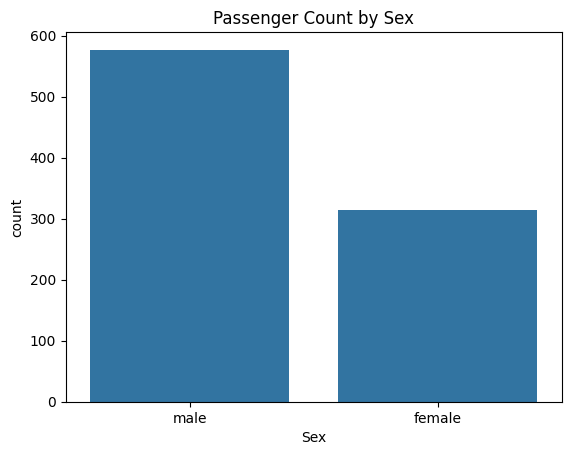

In [28]:
# for sex column 
sns.countplot(x='Sex', data=df) 
plt.title('Passenger Count by Sex')
plt.show()

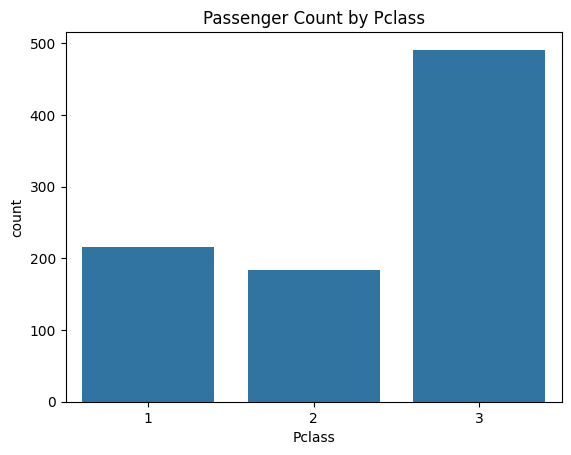

In [29]:
# for sex Pclass 
sns.countplot(x='Pclass', data=df) 
plt.title('Passenger Count by Pclass')
plt.show()

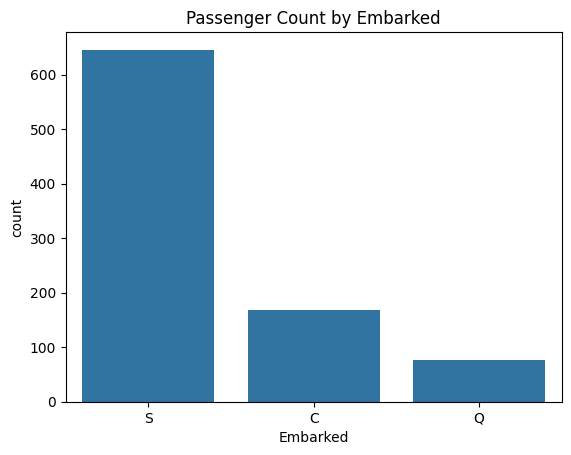

In [30]:
# for Embarked column 
sns.countplot(x='Embarked', data=df) 
plt.title('Passenger Count by Embarked')
plt.show()

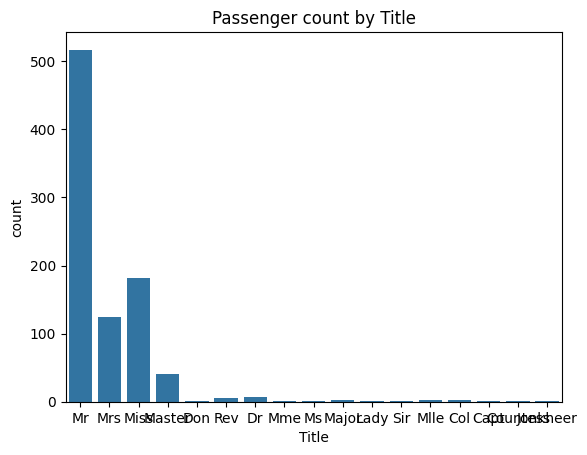

In [31]:
sns.countplot(x='Title', data=df)
plt.title('Passenger count by Title')
plt.show()

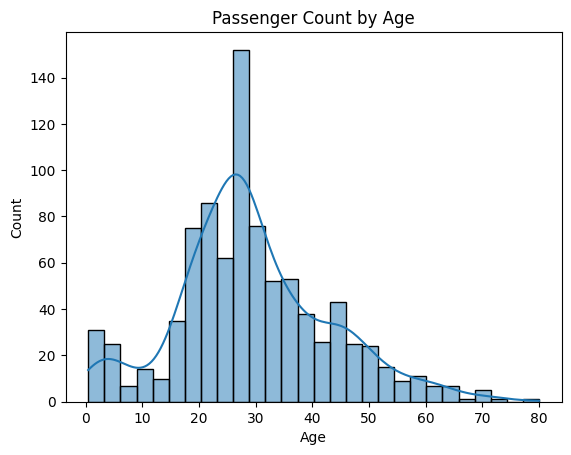

In [32]:
# Analyze numerical features
sns.histplot(df['Age'], kde = True) 
plt.title('Passenger Count by Age') 
plt.show()

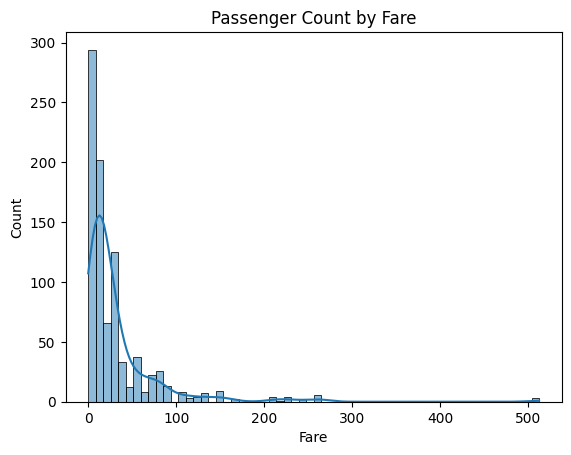

In [33]:
sns.histplot(df['Fare'], kde = True) 
plt.title('Passenger Count by Fare') 
plt.show()

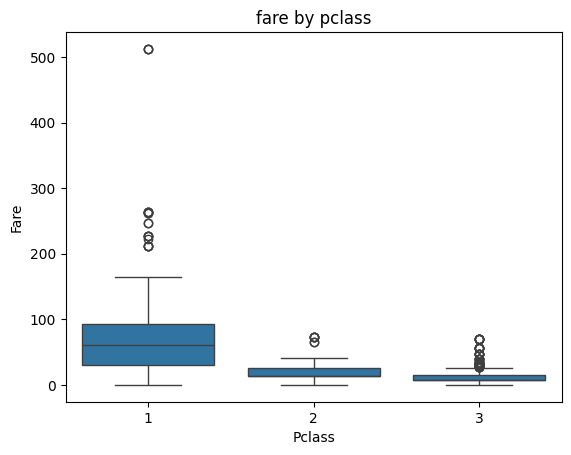

In [34]:
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('fare by pclass')
plt.show()

### Feature relationship with survival 

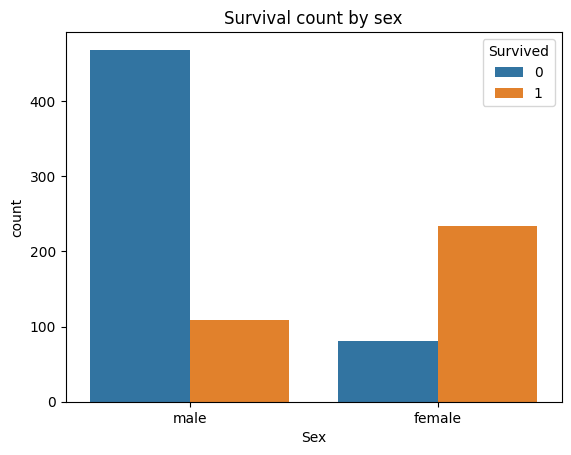

In [35]:
# survival with column sex 
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival count by sex') 
plt.show()

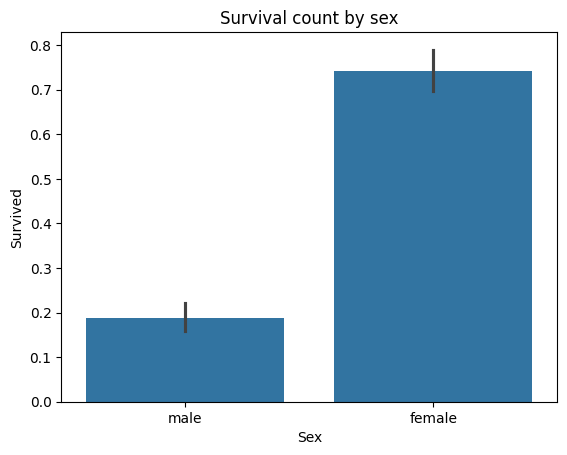

In [36]:
# survival with column sex 
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival count by sex') 
plt.show()

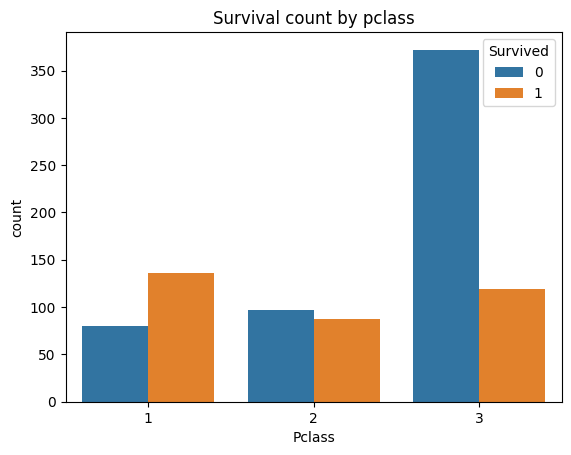

In [37]:
# survival with column pclass 
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival count by pclass') 
plt.show()

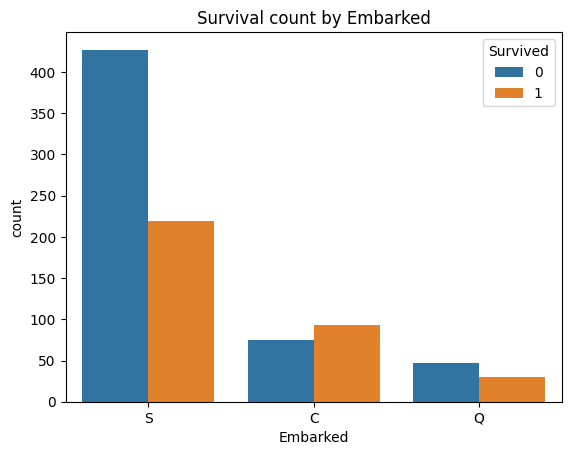

In [38]:
# survival with column Embarked 
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival count by Embarked') 
plt.show()

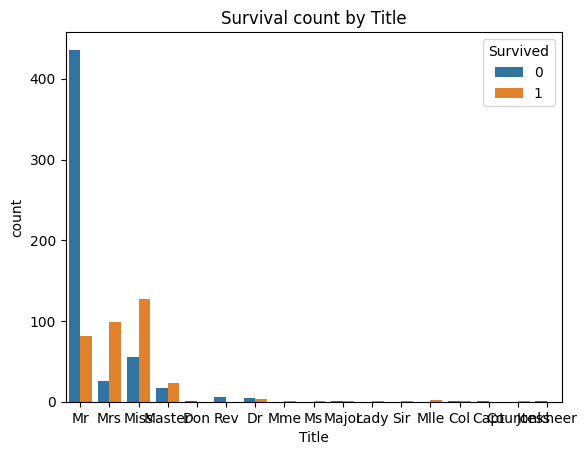

In [39]:
# analyze survival rate by pasanger titles 
sns.countplot(x='Title', hue='Survived', data=df)
plt.title('Survival count by Title')
plt.show()

In [40]:
# calculate survival rate for each passenger title 
#mean_survival_by_title = df.groupby('Title')['Survived'].mean().sort_values(ascending=True)
#mean_survival_by_title

title_summary = df.groupby('Title').agg(
    Count=('Survived', 'size'),
    SurvivalRate=('Survived', 'mean')
).sort_values('SurvivalRate', ascending=False)
title_summary

,Count,SurvivalRate
Title,,
Countess,1,1.000000
Ms,1,1.000000
Lady,1,1.000000
Mme,1,1.000000
Mlle,2,1.000000
Sir,1,1.000000
Mrs,125,0.792000
Miss,182,0.697802
Master,40,0.575000


<function matplotlib.pyplot.show(close=None, block=None)>

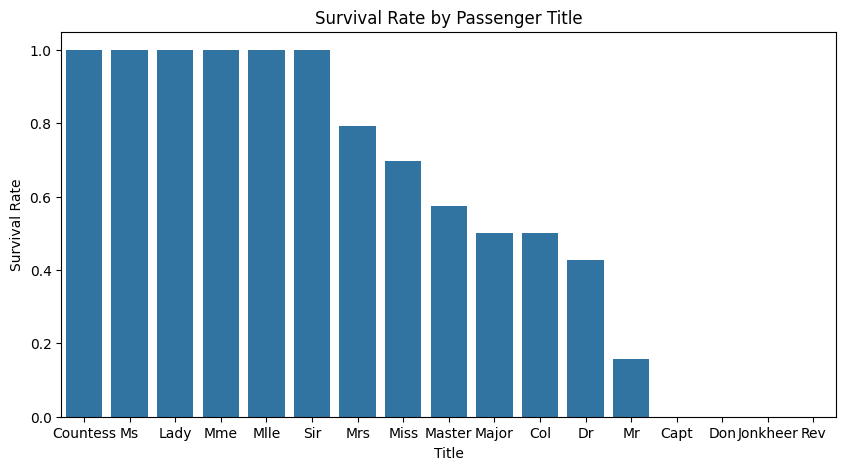

In [41]:
#sns.barplot(x='Title', y='Survived', data=df, errorbar=None)
#plt.title('Survival Rate by Passenger Title')
#plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x='Title', y='Survived', data=df, errorbar=None, order=title_summary.index)
plt.title('Survival Rate by Passenger Title')
plt.ylabel('Survival Rate')
plt.show

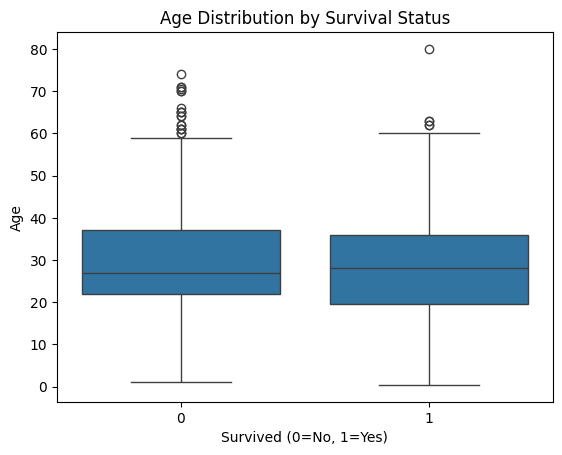

In [42]:
# survival with column Age 
sns.boxplot(x='Survived', y='Age', data = df) 
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived (0=No, 1=Yes)' )
plt.ylabel('Age')
plt.show()

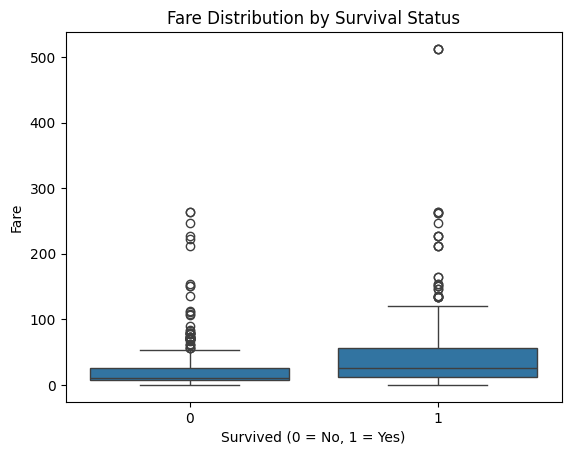

In [43]:
# survival with column pclass 
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

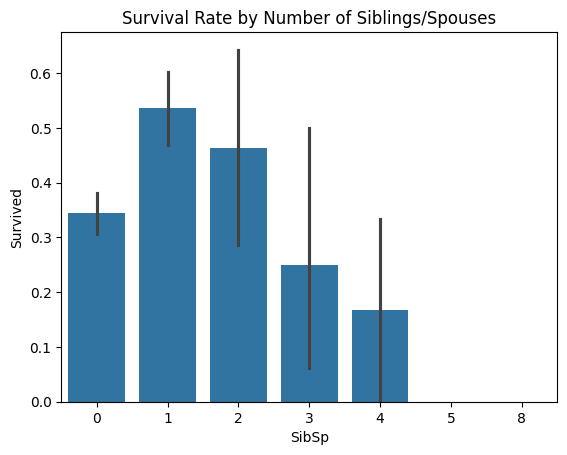

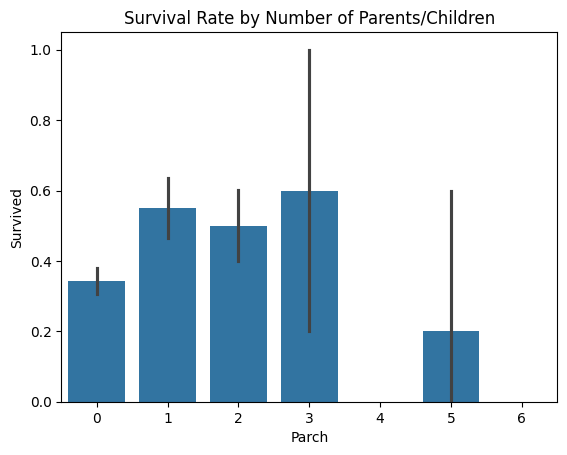

In [44]:
sns.barplot(x = 'SibSp', y ='Survived', data = df) 
plt.title('Survival Rate by Number of Siblings/Spouses')
plt.show()

sns.barplot(x='Parch', y='Survived', data=df)
plt.title('Survival Rate by Number of Parents/Children')
plt.show()

### Identify strogent correlation with survival

In [45]:
df = df.drop(columns=['PassengerId'])
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.5,1,2,W./C. 6607,23.4500,S,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr


In [46]:
# One-hot encode nominal categorical columns
cols_to_onehot = ['Sex', 'Embarked', 'Title']
df = pd.get_dummies(df, columns=cols_to_onehot)
df

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,...,False,False,False,False,False,True,False,False,False,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,...,False,False,False,False,False,False,True,False,False,False
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,...,False,False,True,False,False,False,False,False,False,False
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,...,False,False,False,False,False,False,True,False,False,False
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,False,True,...,False,False,False,False,False,False,False,False,True,False
887,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,True,False,...,False,False,True,False,False,False,False,False,False,False
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",19.5,1,2,W./C. 6607,23.4500,True,False,...,False,False,True,False,False,False,False,False,False,False
889,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,False,True,...,False,False,False,False,False,True,False,False,False,False


In [47]:
df

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,...,False,False,False,False,False,True,False,False,False,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,...,False,False,False,False,False,False,True,False,False,False
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,...,False,False,True,False,False,False,False,False,False,False
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,...,False,False,False,False,False,False,True,False,False,False
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,False,True,...,False,False,False,False,False,False,False,False,True,False
887,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,True,False,...,False,False,True,False,False,False,False,False,False,False
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",19.5,1,2,W./C. 6607,23.4500,True,False,...,False,False,True,False,False,False,False,False,False,False
889,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,False,True,...,False,False,False,False,False,True,False,False,False,False


In [48]:
#For direct numerical correlation, use Pearson’s correlation (works for numeric variables like Pclass, Age, Fare, etc.).
corr_matrix = df.corr(numeric_only=True) 
corr_matrix['Survived'].sort_values(ascending=False)

Survived          1.000000
Sex_female        0.543351
Title_Mrs         0.339040
Title_Miss        0.327093
Fare              0.257307
Embarked_C        0.168240
Title_Master      0.085221
Parch             0.081629
Title_Mlle        0.060095
Title_Lady        0.042470
Title_Mme         0.042470
Title_Countess    0.042470
Title_Ms          0.042470
Title_Sir         0.042470
Title_Major       0.011329
Title_Col         0.011329
Title_Dr          0.008185
Embarked_Q        0.003650
Title_Don        -0.026456
Title_Capt       -0.026456
Title_Jonkheer   -0.026456
SibSp            -0.035322
Age              -0.058738
Title_Rev        -0.064988
Embarked_S       -0.149683
Pclass           -0.338481
Sex_male         -0.543351
Title_Mr         -0.549199
Name: Survived, dtype: float64

###### correct order for correlation with survived column without taking + and - in consideration i.e. absolute values
Survived       1.000000
Sex-num        0.543351
Pclass         0.338481
Fare           0.257307
Title_num      0.201345
Embarked_num   0.167675
Parch          0.081629
Age            0.058738
SibSp          0.035322
PassengerId    0.005007

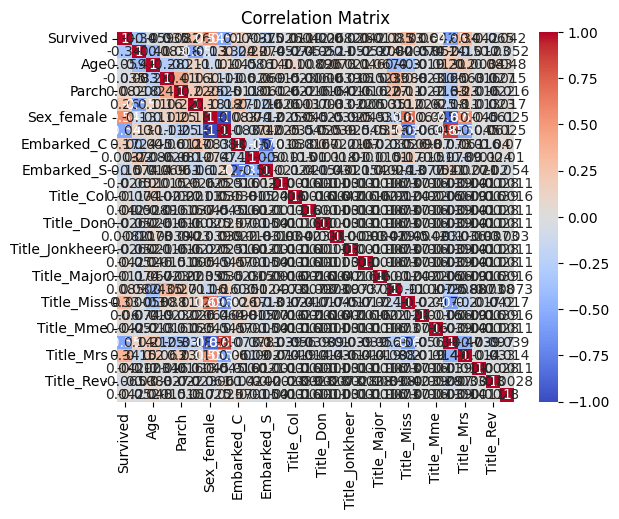

In [49]:
sns.heatmap(df.corr(numeric_only =True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [50]:
#For categorical features (Sex, Embarked, Pclass if treated as category), calculate the survival rate for each category.
#df.groupby('Sex')['Survived'].mean()
#df.groupby('Pclass')['Survived'].mean()
#df.groupby('Embarked')['Survived'].mean()

# Feature Engineering 

In [51]:
df

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,...,False,False,False,False,False,True,False,False,False,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,...,False,False,False,False,False,False,True,False,False,False
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,...,False,False,True,False,False,False,False,False,False,False
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,...,False,False,False,False,False,False,True,False,False,False
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,False,True,...,False,False,False,False,False,False,False,False,True,False
887,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,True,False,...,False,False,True,False,False,False,False,False,False,False
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",19.5,1,2,W./C. 6607,23.4500,True,False,...,False,False,True,False,False,False,False,False,False,False
889,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,False,True,...,False,False,False,False,False,True,False,False,False,False


In [52]:
missing_values = df.isnull().sum()
missing_values

# 0 that means missing values are taken care  of 

Survived          0
Pclass            0
Name              0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Sex_female        0
Sex_male          0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
Title_Capt        0
Title_Col         0
Title_Countess    0
Title_Don         0
Title_Dr          0
Title_Jonkheer    0
Title_Lady        0
Title_Major       0
Title_Master      0
Title_Miss        0
Title_Mlle        0
Title_Mme         0
Title_Mr          0
Title_Mrs         0
Title_Ms          0
Title_Rev         0
Title_Sir         0
dtype: int64

In [53]:
# create familysize feature 
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
df
df['FamilySize'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

In [54]:
# Create IsAlone, FamilyGroup, TicketGroup and FarePerPerson features
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

df['FamilyGroup'] = pd.cut(df['FamilySize'], 
                           bins = [0,1,4,11],
                           labels = ['Alone', 'Small', 'Large'])

ticket_counts = df['Ticket'].value_counts()
df['TicketGroup'] = df['Ticket'].map(ticket_counts)

# FarePerPerson -> Normalize Fare by dividing by the number of people sharing the ticket (fare was usually for the group, not just one person). Helps avoid misleading survival patterns caused by large families paying higher total fares.
# Titanic fare was issued per ticket, not per person.
df['FarePerTicket'] = df['Fare'] / df['TicketGroup']

df['FarePerFamilyMember'] = df['Fare'] / df['FamilySize']

df 

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,...,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,FamilySize,IsAlone,FamilyGroup,TicketGroup,FarePerTicket,FarePerFamilyMember
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,...,False,False,False,False,2,0,Small,1,7.2500,3.62500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,...,True,False,False,False,2,0,Small,1,71.2833,35.64165
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,...,False,False,False,False,1,1,Alone,1,7.9250,7.92500
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,...,True,False,False,False,2,0,Small,2,26.5500,26.55000
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,...,False,False,False,False,1,1,Alone,1,8.0500,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,False,True,...,False,False,True,False,1,1,Alone,1,13.0000,13.00000
887,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,True,False,...,False,False,False,False,1,1,Alone,1,30.0000,30.00000
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",19.5,1,2,W./C. 6607,23.4500,True,False,...,False,False,False,False,4,0,Small,2,11.7250,5.86250
889,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,False,True,...,False,False,False,False,1,1,Alone,1,30.0000,30.00000


In [55]:
# Create AgeBin and FareBin features

# Age bins: Child, Teen, Adult, Senior
df['AgeBin'] = pd.cut(df['Age'],
                      bins=[0,12,18,50,80],
                      labels = ['Child', 'Teen', 'Adult', 'Senior'],
                      include_lowest= True)

#option A - Equal-width bins 
# df['Farebin'] = pd.cut(df['Fare'], 
#                        bins= [  bins=[0, 7.91, 14.454, 31, 512],   # Based on quartiles or domain knowledge
#                         labels=['Low', 'Medium', 'High', 'Very High']
#                         )

# Option B - Equal-frequency bins (qcut)
# Equal-frequency bins (qcut) ensure roughly the same number of passengers in each bin — great for skewed data.
df['FareBin'] = pd.qcut(df['Fare'],
                        q=4, 
                        labels = ['Low', 'Medium', 'High', 'Very High'])

# use FarePerTicket instead of Fare
df['FarePerPersonBin'] = pd.qcut(
    df['FarePerTicket'], 
    q=4, 
    labels=['Low', 'Medium', 'High', 'Very High']
)

df

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,...,Title_Sir,FamilySize,IsAlone,FamilyGroup,TicketGroup,FarePerTicket,FarePerFamilyMember,AgeBin,FareBin,FarePerPersonBin
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,...,False,2,0,Small,1,7.2500,3.62500,Adult,Low,Low
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,...,False,2,0,Small,1,71.2833,35.64165,Adult,Very High,Very High
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,...,False,1,1,Alone,1,7.9250,7.92500,Adult,Medium,Medium
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,...,False,2,0,Small,2,26.5500,26.55000,Adult,Very High,Very High
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,...,False,1,1,Alone,1,8.0500,8.05000,Adult,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,False,True,...,False,1,1,Alone,1,13.0000,13.00000,Adult,Medium,High
887,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,True,False,...,False,1,1,Alone,1,30.0000,30.00000,Adult,High,Very High
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",19.5,1,2,W./C. 6607,23.4500,True,False,...,False,4,0,Small,2,11.7250,5.86250,Adult,High,High
889,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,False,True,...,False,1,1,Alone,1,30.0000,30.00000,Adult,High,Very High


In [56]:
# extract values to use in streamlit 
fare_bins, bin_edges = pd.qcut(df['Fare'], q=4, labels=['Low','Medium','High','Very High'], retbins=True)
print(bin_edges)  # Copy these values for streamlit 



[  0.       7.9104  14.4542  31.     512.3292]


In [57]:
fare_per_person_bins, fare_per_person_bin_edges = pd.qcut(
    df['FarePerTicket'], 
    q=4, 
    labels=['Low', 'Medium', 'High', 'Very High'], 
    retbins=True
)

print(fare_per_person_bin_edges)  # Copy these bin edges for later use in Streamlit

[  0.       7.7625   8.85    24.2882 221.7792]


In [58]:
# check fare skewness 

mean = df['Fare'].mean()
median = df['Fare'].median()
std_dev = df['Fare'].std()

skewness = 3 * (mean - median) / std_dev
print(f'Skewness: {skewness}')

Skewness: 1.0715707369956915


In [59]:
# Encode Categorical variables 
df['FamilyGroup_num'] = df['FamilyGroup'].map({'Alone': 0, 'Small': 1, 'Large': 2})
df['AgeBin_num'] = df['AgeBin'].map({'Child': 0, 'Teen': 1, 'Adult': 2, 'Senior': 3})
df['FareBin_num'] = df['FareBin'].map({'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3})
df['FarePerPersonBin_num'] = df['FarePerPersonBin'].map({'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3})

#Drop the original string columns that have been mapped:
df = df.drop(columns=['FamilyGroup', 'AgeBin', 'FareBin', 'FarePerPersonBin'])

In [60]:
# Force it to numeric explicitly:
df['FamilyGroup_num'] = df['FamilyGroup_num'].astype(int)
df['AgeBin_num'] = df['AgeBin_num'].astype(int)
df['FareBin_num'] = df['FareBin_num'].astype(int)
df['FarePerPersonBin_num'] = df['FarePerPersonBin_num'].astype(int)

In [61]:
df[['FamilyGroup_num','AgeBin_num','FareBin_num','FarePerPersonBin_num']].dtypes

FamilyGroup_num         int64
AgeBin_num              int64
FareBin_num             int64
FarePerPersonBin_num    int64
dtype: object

In [62]:
#For direct numerical correlation, use Pearson’s correlation (works for numeric variables like Pclass, Age, Fare, etc.).
corr_matrix = df.corr(numeric_only=True) 
corr_matrix['Survived'].sort_values(ascending=False)

Survived                1.000000
Sex_female              0.543351
Title_Mrs               0.339040
Title_Miss              0.327093
FarePerPersonBin_num    0.305756
FareBin_num             0.299357
Fare                    0.257307
FarePerTicket           0.254824
FarePerFamilyMember     0.221600
Embarked_C              0.168240
FamilyGroup_num         0.108631
Title_Master            0.085221
Parch                   0.081629
Title_Mlle              0.060095
Title_Lady              0.042470
Title_Mme               0.042470
Title_Countess          0.042470
Title_Sir               0.042470
Title_Ms                0.042470
TicketGroup             0.038247
FamilySize              0.016639
Title_Major             0.011329
Title_Col               0.011329
Title_Dr                0.008185
Embarked_Q              0.003650
Title_Don              -0.026456
Title_Jonkheer         -0.026456
Title_Capt             -0.026456
SibSp                  -0.035322
Age                    -0.058738
Title_Rev 

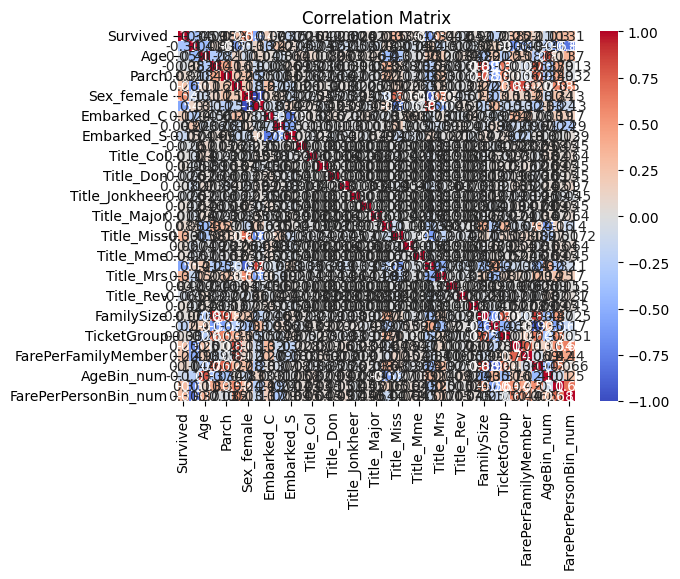

In [63]:
sns.heatmap(df.corr(numeric_only =True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [64]:
df
df.dtypes

Survived                  int64
Pclass                    int64
Name                     object
Age                     float64
SibSp                     int64
Parch                     int64
Ticket                   object
Fare                    float64
Sex_female                 bool
Sex_male                   bool
Embarked_C                 bool
Embarked_Q                 bool
Embarked_S                 bool
Title_Capt                 bool
Title_Col                  bool
Title_Countess             bool
Title_Don                  bool
Title_Dr                   bool
Title_Jonkheer             bool
Title_Lady                 bool
Title_Major                bool
Title_Master               bool
Title_Miss                 bool
Title_Mlle                 bool
Title_Mme                  bool
Title_Mr                   bool
Title_Mrs                  bool
Title_Ms                   bool
Title_Rev                  bool
Title_Sir                  bool
FamilySize                int64
IsAlone 

# Model Development 

In [65]:
#You need to convert categorical/text features into numbers before training. There are a few options:
# Drop columns you don’t want
drop_cols = ['Name', 'Ticket']
df = df.drop(columns=drop_cols)

In [66]:
df.dtypes

Survived                  int64
Pclass                    int64
Age                     float64
SibSp                     int64
Parch                     int64
Fare                    float64
Sex_female                 bool
Sex_male                   bool
Embarked_C                 bool
Embarked_Q                 bool
Embarked_S                 bool
Title_Capt                 bool
Title_Col                  bool
Title_Countess             bool
Title_Don                  bool
Title_Dr                   bool
Title_Jonkheer             bool
Title_Lady                 bool
Title_Major                bool
Title_Master               bool
Title_Miss                 bool
Title_Mlle                 bool
Title_Mme                  bool
Title_Mr                   bool
Title_Mrs                  bool
Title_Ms                   bool
Title_Rev                  bool
Title_Sir                  bool
FamilySize                int64
IsAlone                   int64
TicketGroup               int64
FarePerT

#### Create train/validation split or cross-validation setup

In [67]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived'] 

# Step 1: Split into train_val and test (e.g., 80% train_val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Split train_val into train and validation (e.g., 80% train, 20% val of the 80%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)
# Note: 0.25 x 0.8 = 0.2 → validation is 20% of total data

# Print shapes
print("X Train shape: ", X_train.shape)
print("X Validation shape: ", X_val.shape)
print("X Test shape: ", X_test.shape)

print("y Train shape: ", y_train.shape)
print("y Validation shape: ", y_val.shape)
print("y Test shape: ", y_test.shape)

# Optional: print data
print("X Train : ", X_train)
print("X Validation : ", X_val)
print("X Test : ", X_test)
print("y Train : ", y_train)
print("y Validation : ", y_val)
print("y Test : ", y_test)

X Train shape:  (534, 36)
X Validation shape:  (178, 36)
X Test shape:  (179, 36)
y Train shape:  (534,)
y Validation shape:  (178,)
y Test shape:  (179,)
X Train :       Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
577       1  39.0      1      0  55.9000        True     False       False   
63        3   4.0      3      2  27.9000       False      True       False   
424       3  18.0      1      1  20.2125       False      True       False   
513       1  54.0      1      0  59.4000        True     False        True   
610       3  39.0      1      5  31.2750        True     False       False   
..      ...   ...    ...    ...      ...         ...       ...         ...   
451       3  25.5      1      0  19.9667       False      True       False   
780       3  13.0      0      0   7.2292        True     False        True   
819       3  10.0      3      2  27.9000       False      True       False   
812       2  35.0      0      0  10.5000       False  

In [68]:
# Train baseline Logistic Regression
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression(max_iter=1000) 
logreg.fit(X_train, y_train) 

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [69]:
# Train Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42 )    # n_estimators -> The number of trees in the forest.
rf.fit(X_train, y_train) 

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [70]:
# Train Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier 
gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1, random_state=42) #learning_rate=0.1 shrinks the contribution of each new tree to prevent overfitting. Smaller values require more trees; larger can fit faster but may overfit.
gb.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [71]:
!pip install xgboost
!pip install lightgbm

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   - -------------------------------------- 2.1/56.8 MB 7.0 MB/s eta 0:00:08
   -- ------------------------------------- 3.7/56.8 MB 7.3 MB/s eta 0:00:08
   -- ------------------------------------- 4.2/56.8 MB 5.8 MB/s eta 0:00:10
   ---- ----------------------------------- 7.1/56.8 MB 7.5 MB/s eta 0:00:07
   ----- ---------------------------------- 8.1/56.8 MB 7.2 MB/s eta 0:00:07
   ------ --------------------------------- 8.9/56.8 MB 6.9 MB/s eta 0:00:07
   ------- -------------------------------- 10.0/56.8 MB 6.4 MB/s eta 0:00:08
   ------- -------------------------------- 10.5/56.8 MB 6.0 MB/s eta 0:00:08
   ------- -------------------------------- 11.0/56.8 MB 5.5 MB/s eta 0:00:09
   ------- -------------------------------- 11.0/56.8 MB 5.5 MB/s eta 0:00:09
   ------- -------------------------------- 11.3/56.8 MB 5.0 MB/s eta 0:00:10
   -----

In [72]:
# Train XGBoost / LightGBM
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=100, learning_rate=0.1, use_label_encoder=False,
    eval_metric='logloss', random_state=42
)
xgb.fit(X_train, y_train)

# use_label_encoder=False: In recent versions of XGBoost, label encoding is handled externally; this disables XGBoost's built-in label encoder to avoid warnings.

#eval_metric='logloss': Specifies the evaluation metric as logistic loss, a common loss function for classification tasks focusing on probabilistic outputs.

c:\Users\Prachi\anaconda3\envs\titanic313\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:03:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [73]:
# evaluating ROC-AUC quickly for baseline (checking which one is best model so that we can then do the hyperparameter tuning only for best model 

# the dictionary of models 
from sklearn.metrics import roc_auc_score

models = { 
    "Logistic Regression" : logreg,
    "Random Forest" : rf,
    "Gradient Boosting" : gb, 
    "XGBoost" : xgb
}
best_score = 0 
best_model_name = None

# Looping over models 
for name, model in models.items():
    # predict probabilities 
    y_proba = model.predict_proba(X_val)[:,1]
    score = roc_auc_score(y_val, y_proba)
    print(f"{name} ROC-AUC: {score:.4f}")

    if score > best_score:
        best_score = score 
        best_model_name = name

print(f"\n Best Model on Validation: {best_model_name} with ROC-AUC: {best_score:.4f}")

#Evaluate best model on test set 
best_model = models[best_model_name]
y_test_proba = best_model.predict_proba(X_test)[:,1]
test_score = roc_auc_score(y_test, y_test_proba)
print(f"\nROC-AUC on Test set ({best_model_name}): {test_score:.4f}")




Logistic Regression ROC-AUC: 0.8614
Random Forest ROC-AUC: 0.8858
Gradient Boosting ROC-AUC: 0.9031
XGBoost ROC-AUC: 0.8956

 Best Model on Validation: Gradient Boosting with ROC-AUC: 0.9031

ROC-AUC on Test set (Gradient Boosting): 0.8351


In [74]:
# Hyperparameter tuning for best model

from sklearn.model_selection import GridSearchCV
#define parameter grid
# Define parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 150],      # number of boosting stages (trees)
    'learning_rate': [0.01, 0.05, 0.1],  # shrinks the contribution of each tree
    'max_depth': [3, 4, 5],               # maximum depth of each tree
    'subsample': [0.8, 1.0],              # fraction of samples used for fitting each tree
    'min_samples_split': [2, 5, 10]       # minimum number of samples required to split a node
}

# Initialize Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='roc_auc',  # optimizing ROC-AUC
    cv=5,
    n_jobs=-1
)

# fit on training data 
grid_search.fit(X_train, y_train)

# Best Parameters and CV Scores 
print("Best Parameters :" , grid_search.best_params_) # the hyperparameters that gave the highest ROC-AUC during CV.
print("Best CV ROC-AUC score :", grid_search.best_score_)  # the corresponding ROC-AUC on the cross-validation.

# Use the best model for validation for set 
best_gb = grid_search.best_estimator_     # automatically stores the trained model with the best parameters. #final Logistic Regression model with tuned parameters.

#validation set evaluation
y_val_proba = best_gb.predict_proba(X_val)[:,1]    #gives probability predictions (needed for ROC-AUC).
roc_auc_val = roc_auc_score(y_val, y_val_proba)      # evaluates ROC-AUC on your validation set, to check real performance.
print(f"Validation ROC-AUC score: , {roc_auc_val:.4f}")

# Test set evaluation 
y_test_proba_hype = best_gb.predict_proba(X_test)[:,1]
roc_auc_test = roc_auc_score(y_test, y_test_proba_hype)
print(f"\n Test ROC-AUC score: {roc_auc_test:.4f}")


Best Parameters : {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.8}
Best CV ROC-AUC score : 0.8791329808402981
Validation ROC-AUC score: , 0.9146

 Test ROC-AUC score: 0.8490


Validation Accuracy: 0.8427
Validation ROC-AUC: 0.9146
Validation Confusion Matrix:
[[98 12]
 [16 52]]

Test Accuracy: 0.8212
Test ROC-AUC: 0.8351
Test Confusion Matrix:
[[98 12]
 [20 49]]


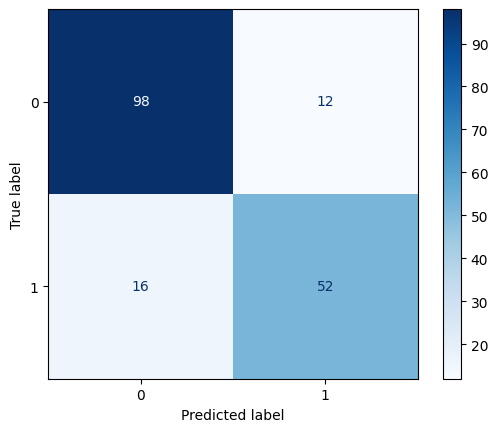

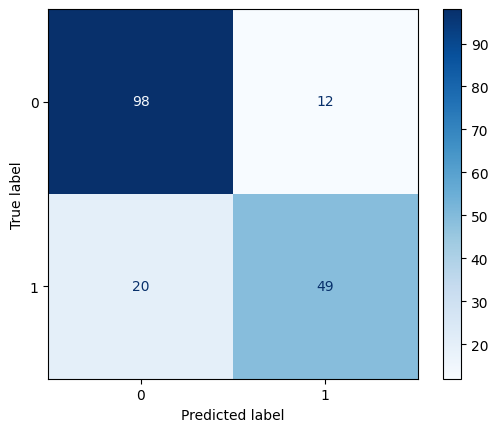

In [75]:
# Model Evaluation 
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay


# ---------------- Validation Set ----------------
y_val_pred = best_gb.predict(X_val)
y_val_proba = best_gb.predict_proba(X_val)[:, 1]

# Accuracy ad ROC-AUC and confusion matrix on validation set
acc_val = accuracy_score(y_val, y_val_pred)
roc_auc_val = roc_auc_score(y_val, y_val_proba)
cm_val = confusion_matrix(y_val, y_val_pred)

print(f"Validation Accuracy: {acc_val:.4f}")
print(f"Validation ROC-AUC: {roc_auc_val:.4f}")
print("Validation Confusion Matrix:")
print(cm_val)

disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=best_gb.classes_)
disp_val.plot(cmap='Blues')

# ---------------- Test Set ----------------
y_test_pred = best_gb.predict(X_test)
y_test_proba_hype = best_gb.predict_proba(X_test)[:,1]

acc_test = accuracy_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_proba)
cm_test = confusion_matrix(y_test, y_test_pred)

print(f"\nTest Accuracy: {acc_test:.4f}")
print(f"Test ROC-AUC: {roc_auc_test:.4f}")
print("Test Confusion Matrix:")
print(cm_test)

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=best_gb.classes_)
disp_test.plot(cmap='Blues')


Feature Importances:
Title_Mr                0.319992
FarePerTicket           0.124503
Age                     0.106159
FarePerFamilyMember     0.088983
Sex_male                0.074112
Pclass                  0.064308
Fare                    0.051336
Sex_female              0.048301
TicketGroup             0.038587
Embarked_S              0.018946
FamilySize              0.011447
Title_Rev               0.008778
Title_Miss              0.008699
Title_Mrs               0.007634
SibSp                   0.004332
Title_Don               0.004281
FareBin_num             0.003782
FarePerPersonBin_num    0.003617
AgeBin_num              0.002706
FamilyGroup_num         0.002339
Embarked_Q              0.002320
Embarked_C              0.002147
Title_Master            0.001535
Title_Dr                0.001042
Parch                   0.000113
Title_Col               0.000000
Title_Capt              0.000000
Title_Jonkheer          0.000000
Title_Lady              0.000000
Title_Major          

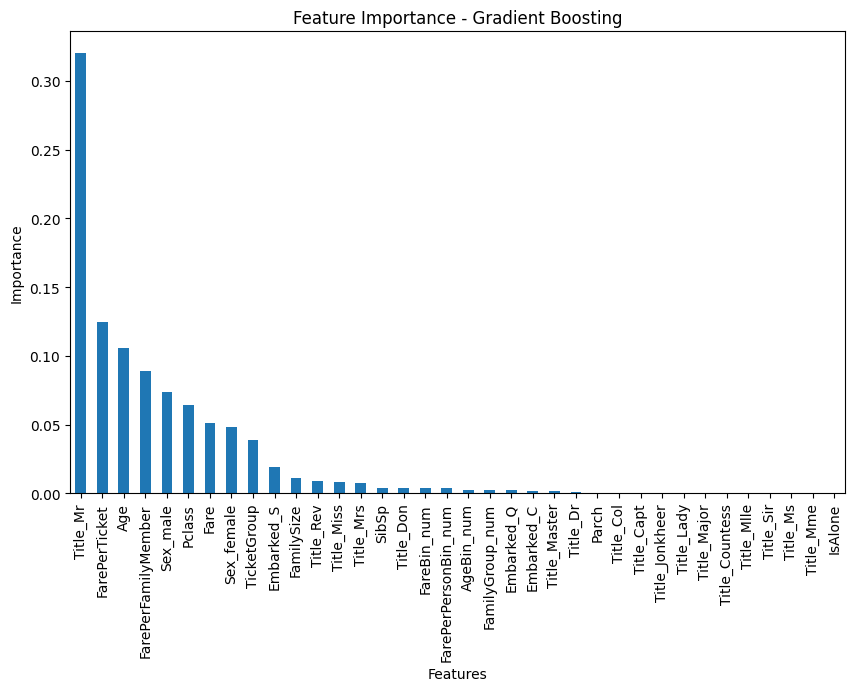

In [76]:
# Get feature importance
feature_importances = pd.Series(best_gb.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Print feature importance
print("\nFeature Importances:")
print(feature_importances)

# Optional: Visualize feature importance
plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title("Feature Importance - Gradient Boosting")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

In [77]:
# create best_model.pkl file
# Details stored in best_model.pkl:

# All the internal states of your trained model: including trees, weights, and hyperparameters.

# The model can be loaded again using pickle and directly used for .predict() or .predict_proba() on new (feature-engineered and encoded) Titanic data.

import pickle
with open('best_model.pkl', 'wb') as f: 
    pickle.dump(best_gb,f)

print("Best Gradient Boosting model saved as best_model.pkl")

# import joblib

# # Save instead of pickle
# joblib.dump(best_gb, "best_model.pkl")

# print("Model saved with joblib")

Best Gradient Boosting model saved as best_model.pkl


In [78]:
import sklearn
print(sklearn.__version__)

1.7.1


In [79]:
import sklearn
import pandas as pd
import numpy as np

print("scikit-learn:", sklearn.__version__)
print("pandas:", pd.__version__)
print("numpy:", np.__version__)

scikit-learn: 1.7.1
pandas: 2.3.1
numpy: 2.3.2


In [80]:
import streamlit
import numpy
import pandas
import sklearn
import matplotlib
import seaborn
import xgboost

print("streamlit:", streamlit.__version__)
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("scikit-learn:", sklearn.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", seaborn.__version__)
print("xgboost:", xgboost.__version__)

streamlit: 1.48.1
numpy: 2.3.2
pandas: 2.3.1
scikit-learn: 1.7.1
matplotlib: 3.10.5
seaborn: 0.13.2
xgboost: 3.0.4
